In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import re 

import scipy.stats as stats  

%matplotlib inline 

sns.set(style = "ticks")

from dateutil.relativedelta import relativedelta
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import metrics

In [2]:
crops = pd.read_csv('crops.csv')

In [3]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crops.shape

(2200, 8)

In [5]:
crops.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crops.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
dict1 = {'rice':'food',
       'maize':'food',
       'jute':'plant',
       'cotton':'plant',
       'coconut':'plant',
       'papaya':'plant',
       'orange':'plant',
       'apple':'plant',
       'muskmelon':'plant',
       'watermelon':'plant',
       'grapes':'plant',
       'mango':'plant',
       'banana':'plant',
       'pomegranate':'plant',
       'lentil':'food',
       'blackgram':'food',
       'mungbean':'food',
       'mothbeans':'food',
       'pigeonpeas':'food',
       'kidneybeans':'food',
       'chickpea':'food',
       'coffee':'plant'}

In [8]:
crops['class'] = crops['label'].map(dict1)

In [9]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label,class
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,food
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,food
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,food
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,food
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,food


In [10]:
dict = {'food':0,'plant':1}

In [11]:
crops['code'] = crops['class'].map(dict)

In [12]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label,class,code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,food,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,food,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,food,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,food,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,food,0


In [13]:
crops.code.value_counts()

code
1    1300
0     900
Name: count, dtype: int64

In [14]:
crop_copy = crops.copy()

In [15]:
crop_copy = crop_copy.drop(columns = ['label','class'])

In [16]:
crop_copy.head()

,N,P,K,temperature,humidity,ph,rainfall,code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [17]:
crop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   code         2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


# ***Outlier Detection and Treatment***

In [18]:
crop_copy.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'code'], dtype='object')

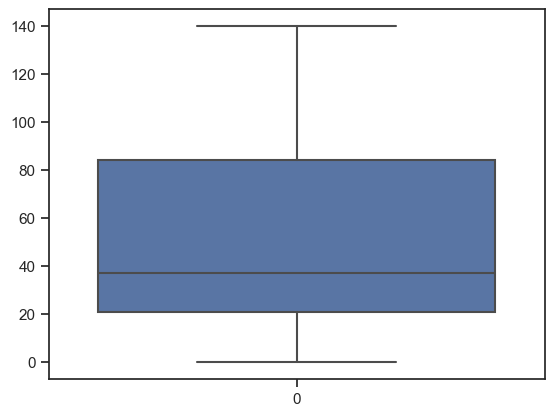

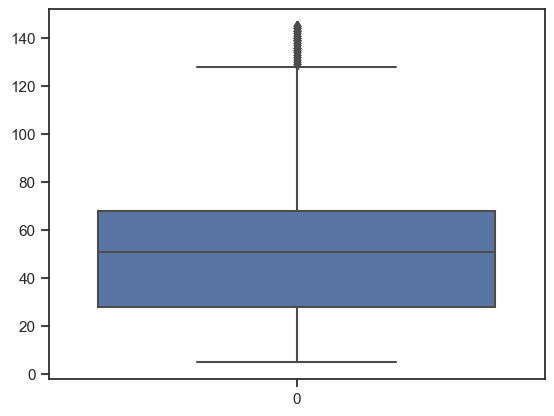

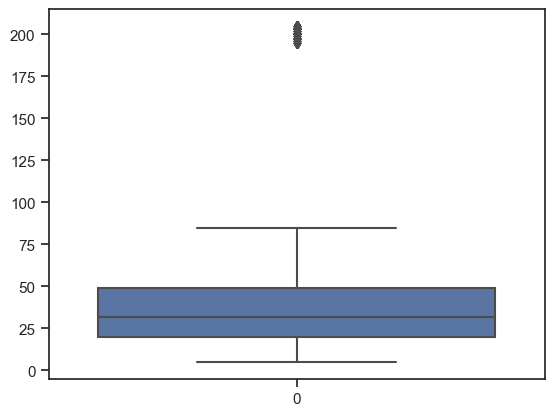

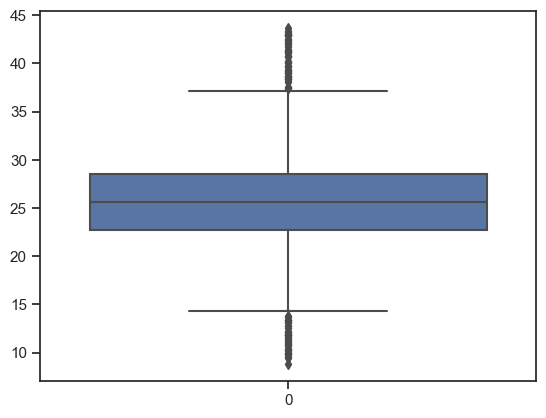

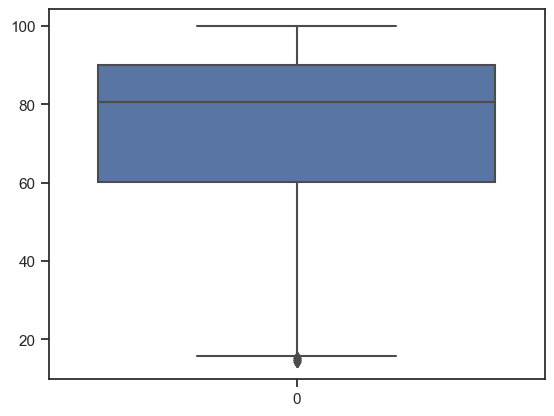

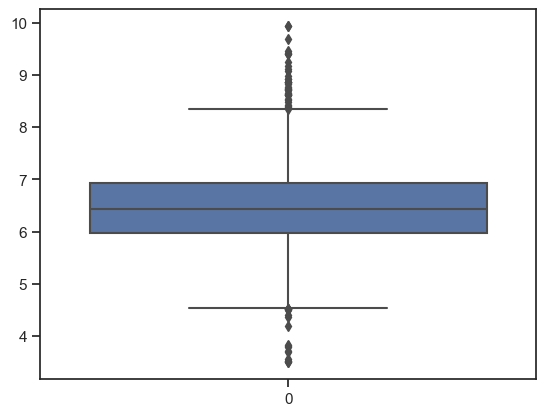

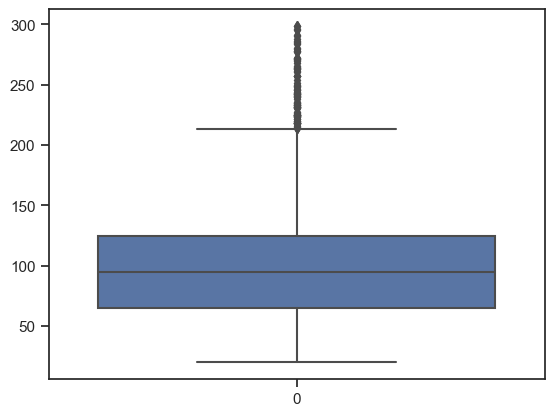

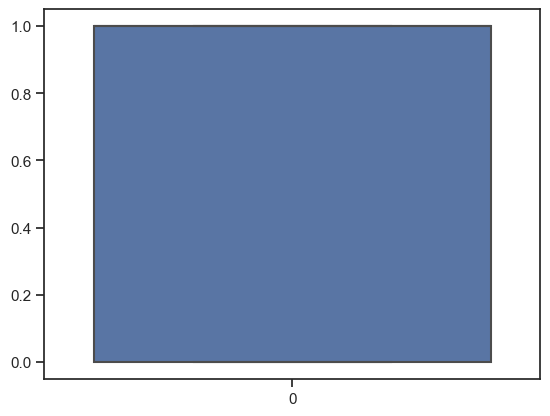

In [19]:
for i in crop_copy.columns:
    sns.boxplot(crop_copy[i])
    plt.show()

# ***Outlier Treatment of all the columns***

In [20]:
crop_ot =  crop_copy.copy() 

In [21]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [22]:
crop_ot.apply(outliertreat_IQR)

,N,P,K,temperature,humidity,ph,rainfall,code
0,-73.875,-32.0,-23.5,14.080956,15.731726,4.543768,-25.022047,-1.5
1,179.125,128.0,92.5,37.250073,134.478998,8.351567,213.841241,2.5


In [23]:
crop_ot['P'] = crop_ot['P'].clip(lower = -32.0, upper = 128.0)
crop_ot['K'] = crop_ot['K'].clip(lower = -23.0, upper = 92.5)
crop_ot['temperature'] = crop_ot['temperature'].clip(lower = 14.080956, upper = 37.250073)
crop_ot['humidity'] = crop_ot['humidity'].clip(lower = 15.731726, upper = 134.478998)
crop_ot['ph'] = crop_ot['ph'].clip(lower = 	4.543768, upper = 8.351567)
crop_ot['rainfall'] = crop_ot['rainfall'].clip(lower = -25.022047, upper = 213.841241)

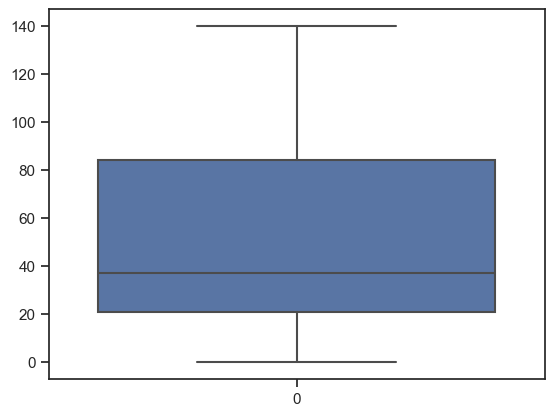

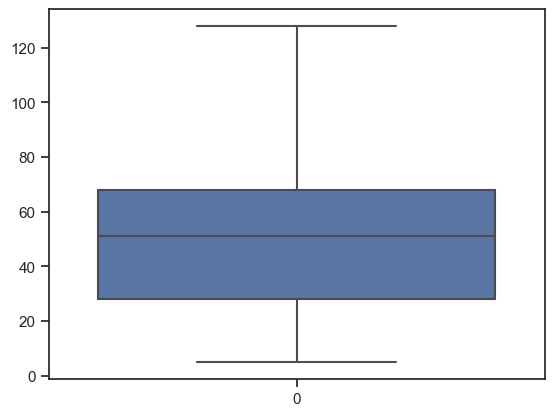

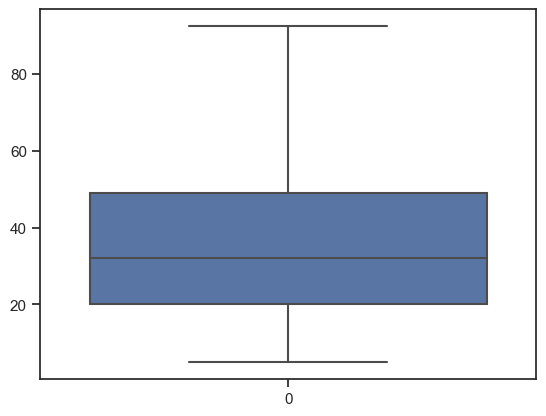

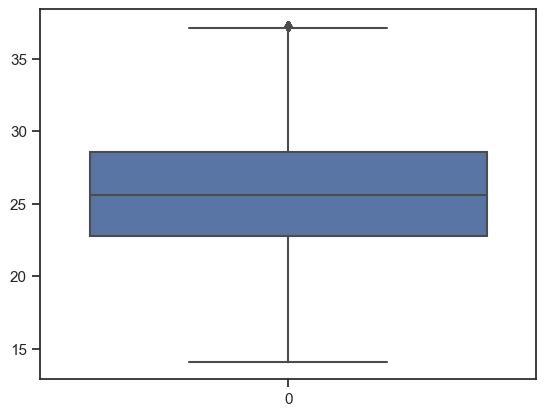

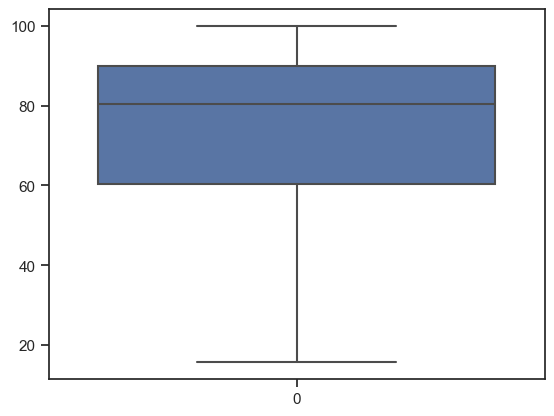

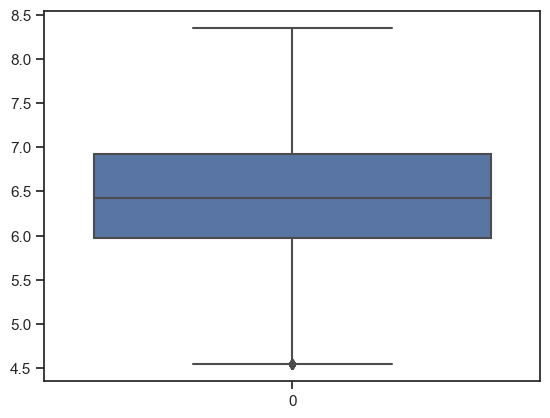

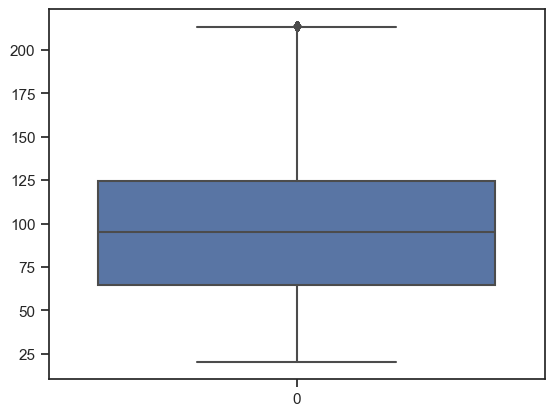

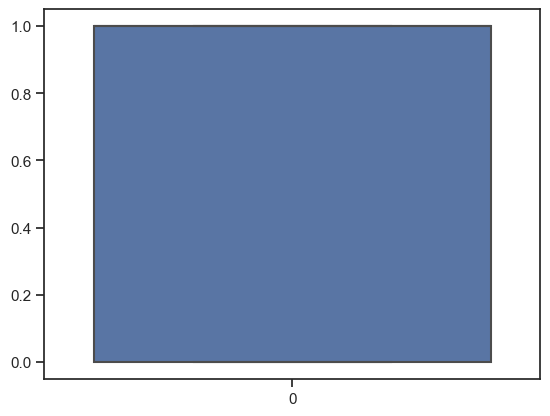

In [24]:
for i in crop_ot.columns:
    sns.boxplot(crop_ot[i])
    plt.show()

# ***Checking the Probability Distribution of the Variables***

In [25]:
crop_ot.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'code'], dtype='object')

C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

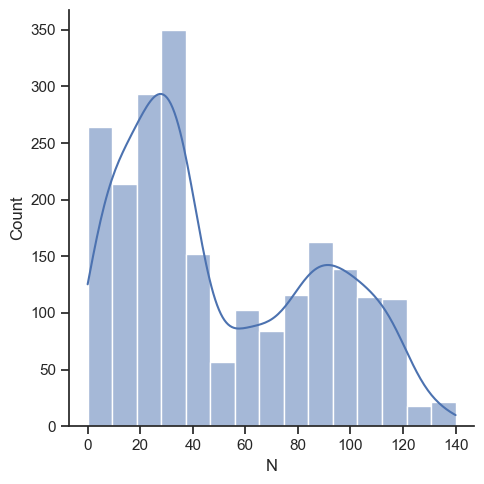

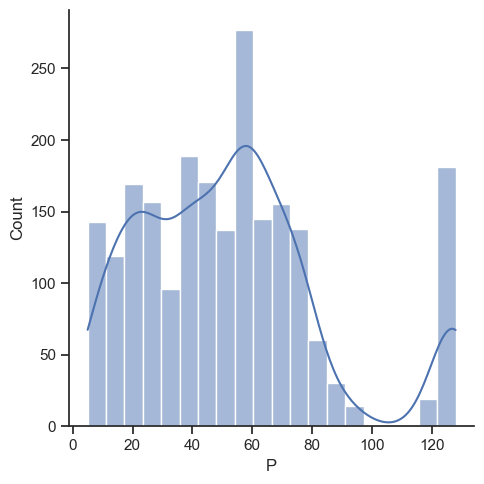

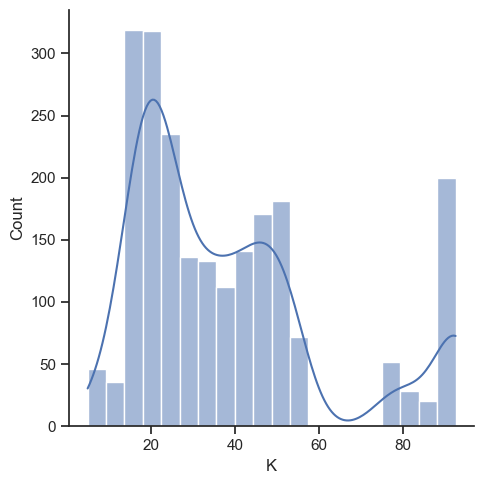

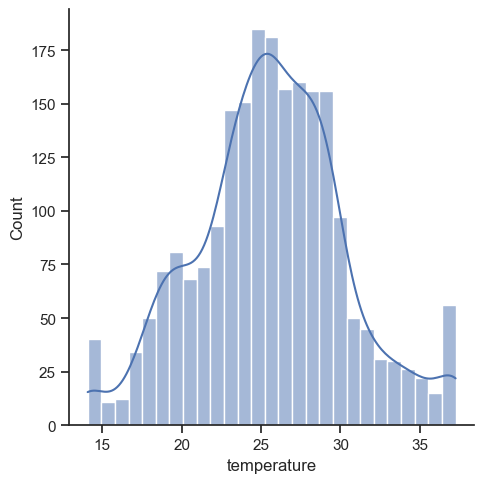

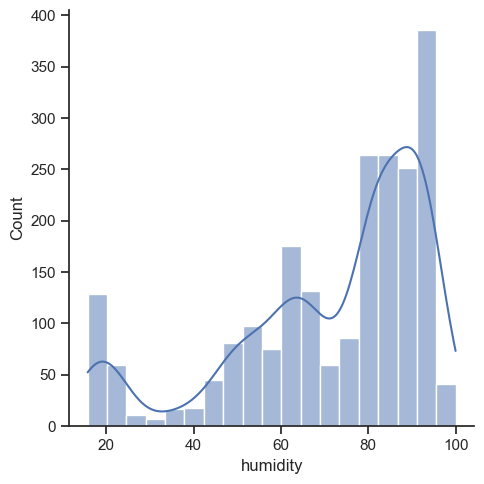

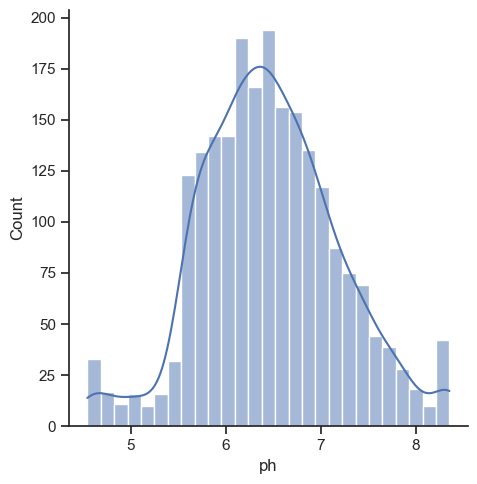

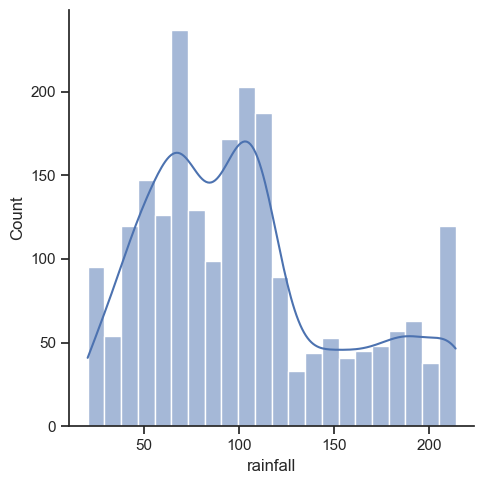

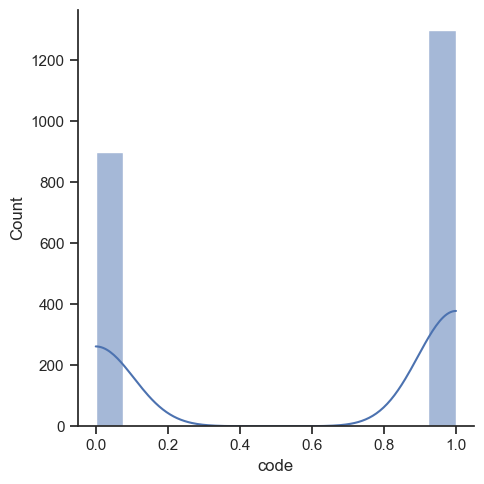

In [26]:
for i in crop_ot.columns:
    sns.displot(crop_ot[i], kde = True)

# ***Logorithemic Transformations***

C:\Users\VJahn\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\L

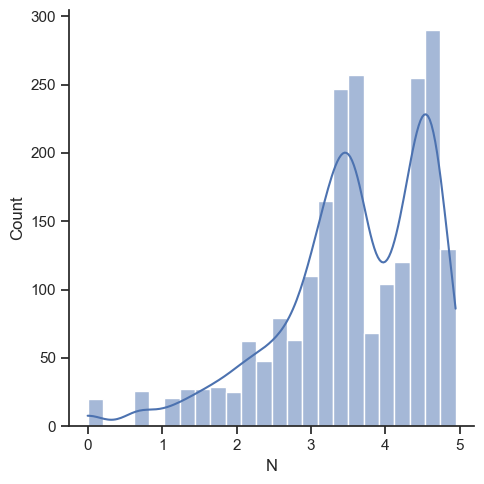

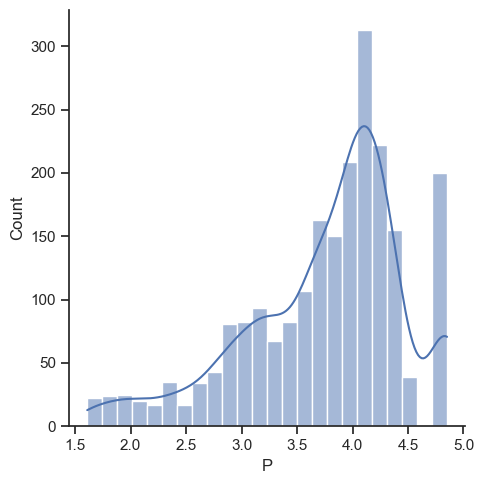

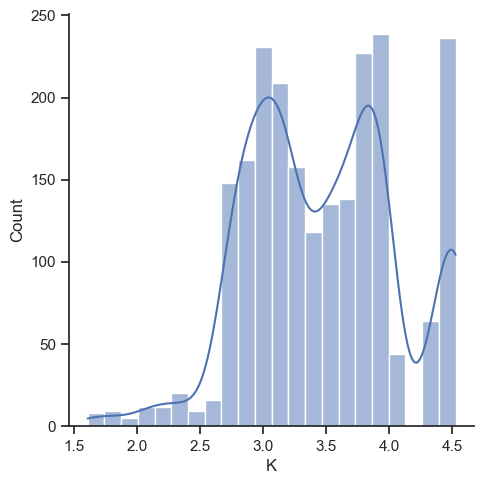

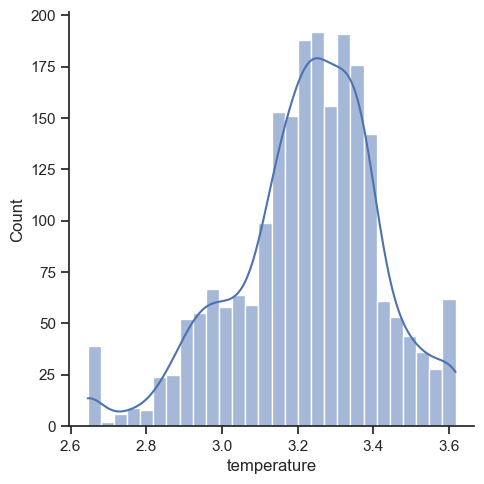

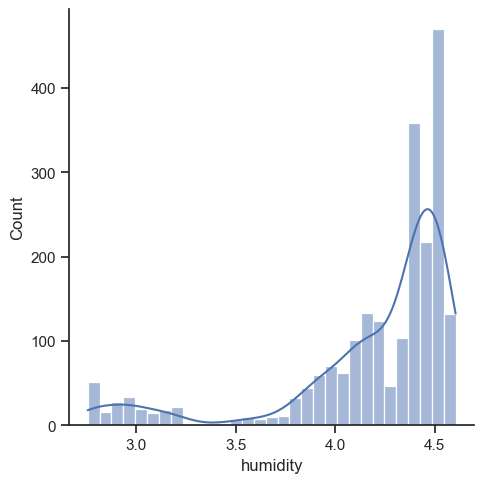

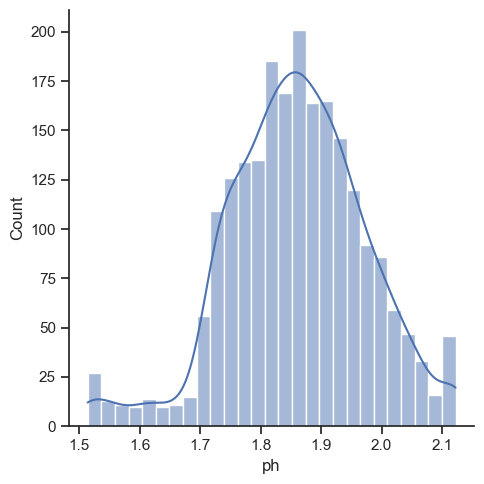

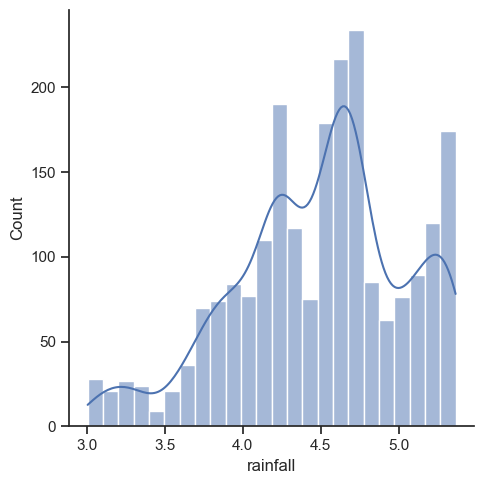

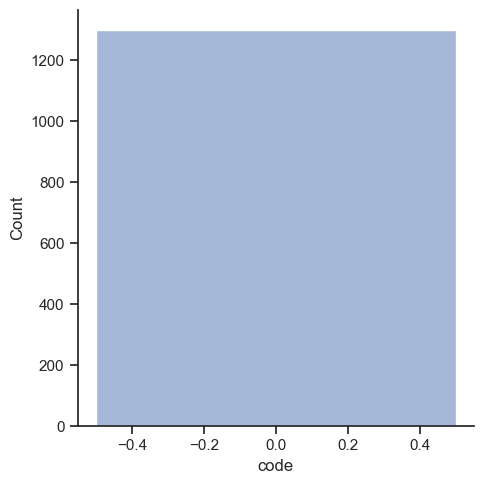

In [27]:
for i in crop_ot.columns:
    sns.displot(np.log(crop_ot[i]), kde = True)

In [28]:
crop_ot['log_N'] = np.log(crop_ot['N'])

C:\Users\VJahn\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
crop_ot['log_P'] = np.log(crop_ot['P'])

In [30]:
crop_ot['log_K'] = np.log(crop_ot['K'])

In [31]:
crop_ot['log_humidity'] = np.log(crop_ot['humidity'])

In [32]:
crop_ot['log_rainfall'] = np.log(crop_ot['rainfall'])

In [33]:
crop_ot['log_ph'] = np.log(crop_ot['ph'])

In [34]:
crop_ot['log_temp'] = np.log(crop_ot['temperature'])

In [35]:
crop_ot.head()

,N,P,K,temperature,humidity,ph,rainfall,code,log_N,log_P,log_K,log_humidity,log_rainfall,log_ph,log_temp
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,0,4.499810,3.737670,3.761200,4.406753,5.312888,1.872261,3.038779
1,85,58,41.0,21.770462,80.319644,7.038096,213.841241,0,4.442651,4.060443,3.713572,4.386014,5.365234,1.951338,3.080554
2,60,55,44.0,23.004459,82.320763,7.840207,213.841241,0,4.094345,4.007333,3.784190,4.410623,5.365234,2.059265,3.135688
3,74,35,40.0,26.491096,80.158363,6.980401,213.841241,0,4.304065,3.555348,3.688879,4.384004,5.365234,1.943106,3.276809
4,78,42,42.0,20.130175,81.604873,7.628473,213.841241,0,4.356709,3.737670,3.737670,4.401889,5.365234,2.031888,3.002220


In [36]:
crop_ot = crop_ot.drop(columns = ['P', 'K', 'humidity', 'rainfall', 'log_N', 'temperature', 'ph'])

# **Splitting the Data into Training and Testing Datasets using SKLearn method**

In [37]:
y = crop_ot['code']

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: code, dtype: int64

In [39]:
X = crop_ot.columns.difference(['code'])

In [40]:
X

Index(['N', 'log_K', 'log_P', 'log_humidity', 'log_ph', 'log_rainfall',
       'log_temp'],
      dtype='object')

In [41]:
x = crop_ot[X]

In [42]:
x.head()

,N,log_K,log_P,log_humidity,log_ph,log_rainfall,log_temp
0,90,3.761200,3.737670,4.406753,1.872261,5.312888,3.038779
1,85,3.713572,4.060443,4.386014,1.951338,5.365234,3.080554
2,60,3.784190,4.007333,4.410623,2.059265,5.365234,3.135688
3,74,3.688879,3.555348,4.384004,1.943106,5.365234,3.276809
4,78,3.737670,3.737670,4.401889,2.031888,5.365234,3.002220


In [43]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =123)

In [44]:
x_train.shape

(1540, 7)

In [45]:
y_train.shape

(1540,)

In [46]:
x_test.shape

(660, 7)

In [47]:
y_test.shape

(660,)

# **Building SVM model**

In [48]:
svc = SVC(kernel='linear', random_state=0)  
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [51]:
y_pred = svc.predict(x_test)

In [52]:
#y_pred_proba = svc.predict_proba(x_test)[:, 1]

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8848484848484849
Precision: 0.8905109489051095
Recall: 0.9219143576826196
F1 Score: 0.905940594059406
Confusion Matrix:
 [[218  45]
 [ 31 366]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       263
           1       0.89      0.92      0.91       397

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660



In [ ]:
#param_grid = {'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}
#grid = GridSearchCV(svc, param_grid)
#grid.fit(x_train, y_train)

In [ ]:
#grid.best_params_

In [ ]:
#svc_cv = SVC(kernel='linear', random_state=0)
#svc_cv.fit(x_train, y_train)

In [ ]:
#y_cv_pred = svc_cv.predict(x_test)

In [ ]:
#y_cv_pred_proba = svc_cv.predict_proba(x_test)[:, 1] 

In [ ]:
#accuracy = accuracy_score(y_test, y_cv_pred)
#precision = precision_score(y_test, y_cv_pred)
#recall = recall_score(y_test, y_cv_pred)
#f1 = f1_score(y_test, y_cv_pred)
#roc_auc = roc_auc_score(y_test, y_cv_pred_proba)
#conf_matrix = confusion_matrix(y_test, y_cv_pred)

#print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)
#print("Confusion Matrix:\n", conf_matrix)
#print("\nClassification Report:\n", classification_report(y_test, y_cv_pred))